In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf
import datetime

import warnings
warnings.filterwarnings("ignore")

In [63]:
df = pd.read_excel('D:\Case Study_ Kamereo\kamereo_test_data analyst.xlsx')
df.head(5)

,Date,Category A,Customer,Qty Sold,Revenue
0,20171001,A,2,18,4058699
1,20171001,A,1,29,13178000
2,20171002,A,1,55,23493200
3,20171002,A,2,30,6540835
4,20171003,A,2,25,5888624


In [64]:
df = df.rename(columns = {'Category A':'Category_A','Qty Sold':'Qty_Sold'})

In [65]:
#Data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Date        730 non-null    int64 
 1   Category_A  730 non-null    object
 2   Customer    730 non-null    int64 
 3   Qty_Sold    730 non-null    int64 
 4   Revenue     730 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 28.6+ KB


In [66]:
#Descriptive statistics 
df.describe()

,Date,Customer,Qty_Sold,Revenue
count,7.300000e+02,730.000000,730.000000,7.300000e+02
mean,2.017815e+07,1.500000,79.310959,3.072915e+07
std,4.091248e+03,0.500343,45.602993,3.506576e+07
min,2.017100e+07,1.000000,18.000000,3.995750e+06
25%,2.017123e+07,1.000000,47.000000,1.347950e+07
50%,2.018040e+07,1.500000,70.000000,2.307520e+07
75%,2.018070e+07,2.000000,98.000000,3.907244e+07
max,2.018093e+07,2.000000,396.000000,7.109999e+08


In [67]:
#Check missing values in dataset
df.isnull().sum()

Date          0
Category_A    0
Customer      0
Qty_Sold      0
Revenue       0
dtype: int64

In [68]:
df['Date'].astype(str)

0      20171001
1      20171001
2      20171002
3      20171002
4      20171003
5      20171003
6      20171004
7      20171004
8      20171005
9      20171005
10     20171006
11     20171006
12     20171007
13     20171007
14     20171008
15     20171008
16     20171009
17     20171009
18     20171010
19     20171010
20     20171011
21     20171011
22     20171012
23     20171012
24     20171013
25     20171013
26     20171014
27     20171014
28     20171015
29     20171015
30     20171016
31     20171016
32     20171017
33     20171017
34     20171018
35     20171018
36     20171019
37     20171019
38     20171020
39     20171020
40     20171021
41     20171021
42     20171022
43     20171022
44     20171023
45     20171023
46     20171024
47     20171024
48     20171025
49     20171025
50     20171026
51     20171026
52     20171027
53     20171027
54     20171028
55     20171028
56     20171029
57     20171029
58     20171030
59     20171030
60     20171031
61     20171031
62     2

In [69]:
# Change Date type to Datetime(YYYY-MM-dd)
df['Date'] = pd.to_datetime(df['Date'], format='%Y%m%d')
df.head(5)

,Date,Category_A,Customer,Qty_Sold,Revenue
0,2017-10-01,A,2,18,4058699
1,2017-10-01,A,1,29,13178000
2,2017-10-02,A,1,55,23493200
3,2017-10-02,A,2,30,6540835
4,2017-10-03,A,2,25,5888624


### Evaluate the performance of Category A 

In [70]:
# Number of products sold to 2 customers
Qty_per_Customer = df.groupby('Customer')['Qty_Sold'].sum()
Qty_per_Customer

Customer
1    27620
2    30277
Name: Qty_Sold, dtype: int64

In [71]:
#Revenue earned from customers
Rev_per_Customer = df.groupby('Customer')['Revenue'].sum()
Rev_per_Customer

Customer
1    16401460707
2     6030817784
Name: Revenue, dtype: int64

In [72]:
customers= df['Customer'].unique()
customers

array([2, 1], dtype=int64)

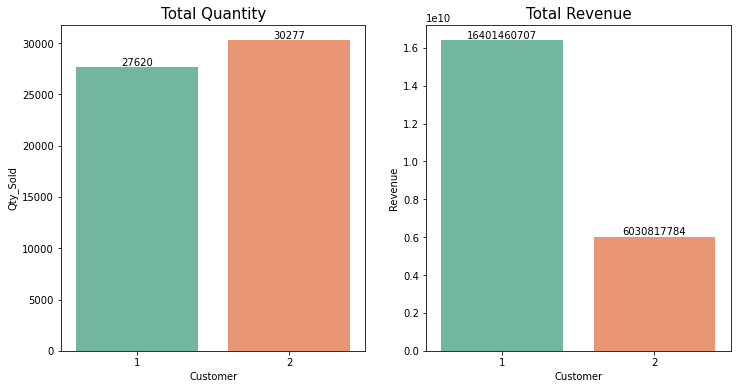

In [73]:
fig,ax = plt.subplots(1,2,figsize=(12,6))
g1 = sns.barplot(x =Qty_per_Customer.index, y=Qty_per_Customer,palette='Set2',ax=ax[0] )
g1.set_title('Total Quantity', size=15)
g1.bar_label(ax[0].containers[0])

g2 = sns.barplot(x =Rev_per_Customer.index, y=Rev_per_Customer,palette='Set2',ax=ax[1] )
g2.set_title('Total Revenue', size=15)
g2.bar_label(ax[1].containers[0],fmt='%i')

plt.show()

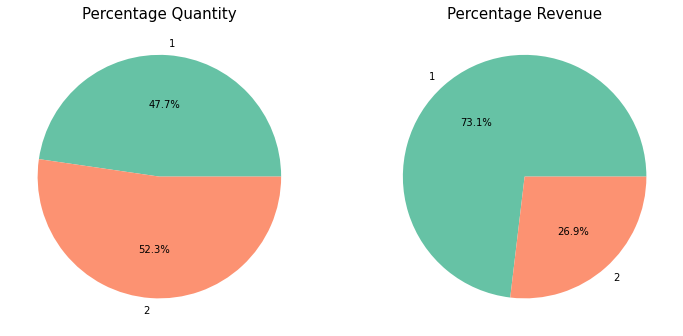

In [74]:
fig,ax = plt.subplots(1,2,figsize=(12,6))
ax[0].pie(Qty_per_Customer,
          labels=Qty_per_Customer.index, 
          autopct='%1.1f%%',
          colors=['#66c2a5','#fc9272'])
ax[0].set_title('Percentage Quantity', size=15)
ax[1].pie(Rev_per_Customer,
          labels=Rev_per_Customer.index,
          autopct='%1.1f%%',
          colors=['#66c2a5','#fc9272'])
ax[1].set_title('Percentage Revenue', size=15)

plt.show()

#### Time-series analysis

Text(0.5, 1.0, 'Daily Quantity sold of Category from Oct 2017 to Sep 2018')

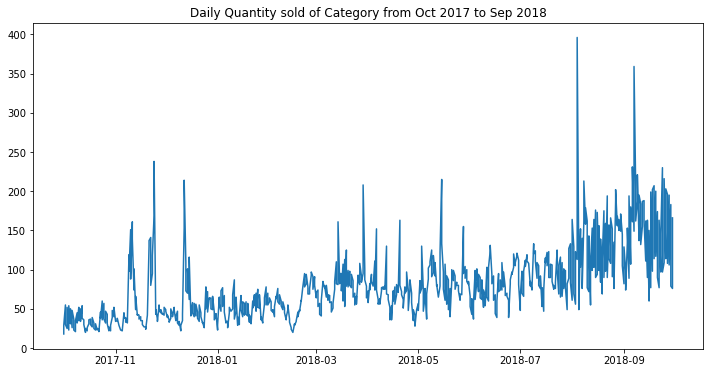

In [75]:
#Revenue distribution over the time
plt.figure(figsize=(12,6))
plt.plot(df['Date'],df['Qty_Sold'])
plt.title('Daily Quantity sold of Category from Oct 2017 to Sep 2018')

Text(0.5, 1.0, 'Daily Revenue of Category A from Oct 2017 to Sep 2018')

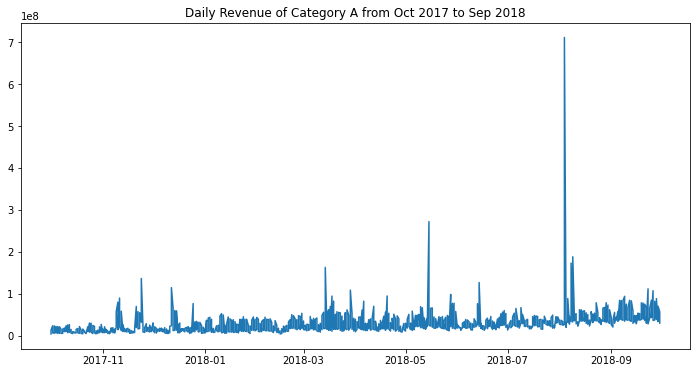

In [76]:
plt.figure(figsize=(12,6))
plt.plot(df['Date'],df['Revenue'])
plt.title('Daily Revenue of Category A from Oct 2017 to Sep 2018')

In [77]:
# Monthly distribution
df['Month_Year'] = df['Date'].dt.strftime('%Y-%m')
df.head()

,Date,Category_A,Customer,Qty_Sold,Revenue,Month_Year
0,2017-10-01,A,2,18,4058699,2017-10
1,2017-10-01,A,1,29,13178000,2017-10
2,2017-10-02,A,1,55,23493200,2017-10
3,2017-10-02,A,2,30,6540835,2017-10
4,2017-10-03,A,2,25,5888624,2017-10


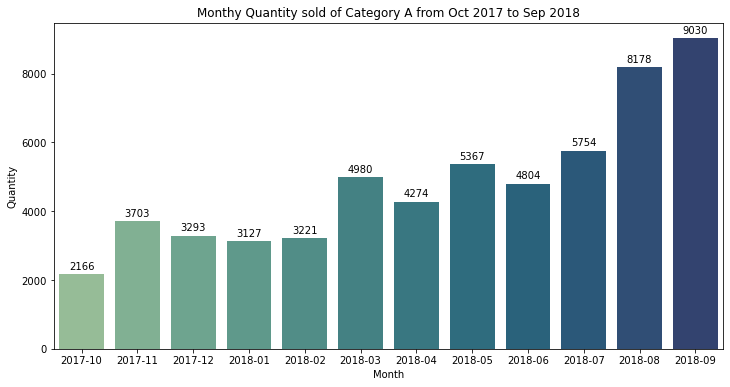

In [78]:
Month_Qty = df.groupby('Month_Year')['Qty_Sold'].sum().to_frame('Qty_Sold')

plt.figure(figsize=(12,6))
g1 = sns.barplot(data =Month_Qty, x =Month_Qty.index, y=Month_Qty.Qty_Sold,palette='crest')
plt.title('Monthy Quantity sold of Category A from Oct 2017 to Sep 2018')
plt.xlabel('Month')
plt.ylabel('Quantity')
g1.bar_label(g1.containers[0], padding = 3)

plt.show()

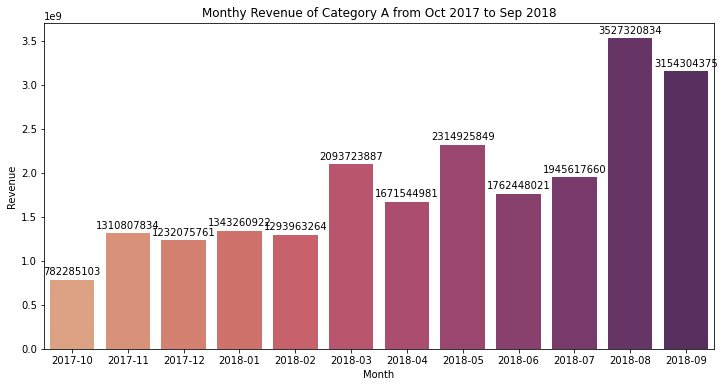

In [79]:
Month_Revenue = df.groupby('Month_Year')['Revenue'].sum().to_frame('Revenue')
import locale
locale.setlocale(locale.LC_ALL, 'en_US')
'en_US'
for i in Month_Revenue.Revenue:
    locale.format("%d",i, grouping=True)

plt.figure(figsize=(12,6))
g2 = sns.barplot(data = Month_Revenue, x =Month_Revenue.index, y=Month_Revenue.Revenue,palette='flare')
plt.title('Monthy Revenue of Category A from Oct 2017 to Sep 2018')
plt.xlabel('Month')
plt.ylabel('Revenue')
g2.bar_label(g2.containers[0], fmt='%i', padding= 3) 

plt.show()

In [80]:
# Detail data in Aug 2018
Aug2018_Revenue = df[df['Month_Year'] == '2018-08']
Aug2018_Revenue.groupby('Date')['Qty_Sold','Revenue'].sum()

,Qty_Sold,Revenue
Date,,
2018-08-01,225,63568279
2018-08-02,198,62967324
2018-08-03,179,58017809
2018-08-04,509,737568813
2018-08-05,150,50866953
2018-08-06,255,121172417
2018-08-07,216,73413062
2018-08-08,375,206303520
2018-08-09,337,220640026


(array([17744., 17748., 17752., 17756., 17760., 17764., 17768., 17772.,
        17775.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

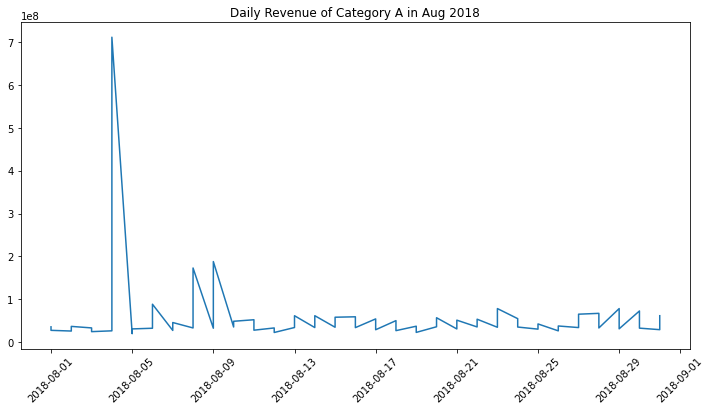

In [81]:
plt.figure(figsize=(12,6))
plt.plot(Aug2018_Revenue['Date'],Aug2018_Revenue['Revenue'])
plt.title('Daily Revenue of Category A in Aug 2018')
plt.xticks(rotation = 45)

Text(0.5, 0.98, 'Distribution of 2 customers to total quantity and total revenue')

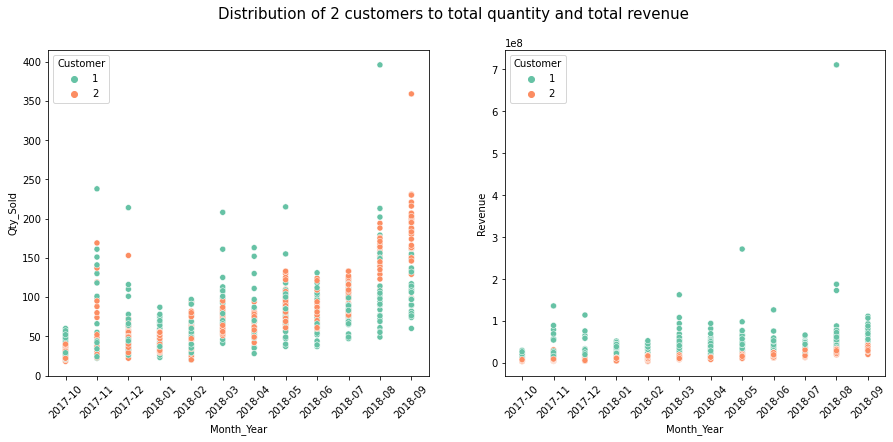

In [82]:
fig,ax = plt.subplots(1,2,figsize=(15,6))
g1 = sns.scatterplot(x="Month_Year", y = "Qty_Sold", data = df,hue = "Customer", palette = 'Set2',ax = ax[0])
g1.set_xticklabels(df.Month_Year.unique(), rotation =45)

g2 = sns.scatterplot(x="Month_Year", y = "Revenue", data = df,hue = "Customer", palette = 'Set2',ax = ax[1])
g2.set_xticklabels(df.Month_Year.unique(), rotation =45)

plt.suptitle('Distribution of 2 customers to total quantity and total revenue', size = 15)

In [83]:
#Finding upper and lower limit
upper_limit = df['Revenue'].quantile(0.999)
lower_limit = df['Revenue'].quantile(0.001)
upper_limit

390869705.81003153

In [84]:
#Removing and replace Outlier values 
df['Revenue'] = np.where(df['Revenue'] >= upper_limit, upper_limit,
                np.where(df['Revenue'] <= lower_limit,lower_limit, df['Revenue'])).astype(int)

<AxesSubplot:xlabel='Month_Year', ylabel='Revenue'>

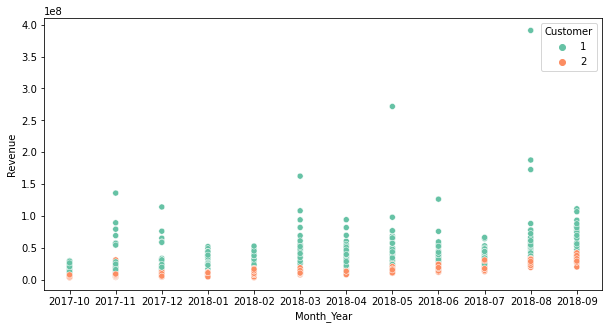

In [85]:
plt.figure(figsize=(10,5))
sns.scatterplot(x="Month_Year", y = "Revenue", data = df,hue = "Customer",palette = 'Set2')

### Forecast the daily performance of Category A in Oct and November

In [86]:
df = df.set_index('Date')
df

,Category_A,Customer,Qty_Sold,Revenue,Month_Year
Date,,,,,
2017-10-01,A,2,18,4058699,2017-10
2017-10-01,A,1,29,13178000,2017-10
2017-10-02,A,1,55,23493200,2017-10
2017-10-02,A,2,30,6540835,2017-10
2017-10-03,A,2,25,5888624,2017-10
2017-10-03,A,1,52,23179200,2017-10
2017-10-04,A,2,23,5918669,2017-10
2017-10-04,A,1,54,21963850,2017-10
2017-10-05,A,2,31,5427120,2017-10


In [87]:
df = df.groupby('Date')[['Revenue']].sum()
df

,Revenue
Date,
2017-10-01,17236699
2017-10-02,30034035
2017-10-03,29067824
2017-10-04,27882519
2017-10-05,26975920
2017-10-06,26540725
2017-10-07,20830666
2017-10-08,21022000
2017-10-09,27282220


In [89]:
df_base= pd.concat([df,df['Revenue'].shift(1)],axis=1)
df_base

,Revenue,Revenue
Date,,
2017-10-01,17236699,NaN
2017-10-02,30034035,17236699.0
2017-10-03,29067824,30034035.0
2017-10-04,27882519,29067824.0
2017-10-05,26975920,27882519.0
2017-10-06,26540725,26975920.0
2017-10-07,20830666,26540725.0
2017-10-08,21022000,20830666.0
2017-10-09,27282220,21022000.0


In [90]:
df_base.columns = ['Actual_Revenue','Forecast_Revenue']
df_base.head()

,Actual_Revenue,Forecast_Revenue
Date,,
2017-10-01,17236699,NaN
2017-10-02,30034035,17236699.0
2017-10-03,29067824,30034035.0
2017-10-04,27882519,29067824.0
2017-10-05,26975920,27882519.0


In [91]:
df_base.dropna(inplace=True)
df_base

,Actual_Revenue,Forecast_Revenue
Date,,
2017-10-02,30034035,17236699.0
2017-10-03,29067824,30034035.0
2017-10-04,27882519,29067824.0
2017-10-05,26975920,27882519.0
2017-10-06,26540725,26975920.0
2017-10-07,20830666,26540725.0
2017-10-08,21022000,20830666.0
2017-10-09,27282220,21022000.0
2017-10-10,32951040,27282220.0


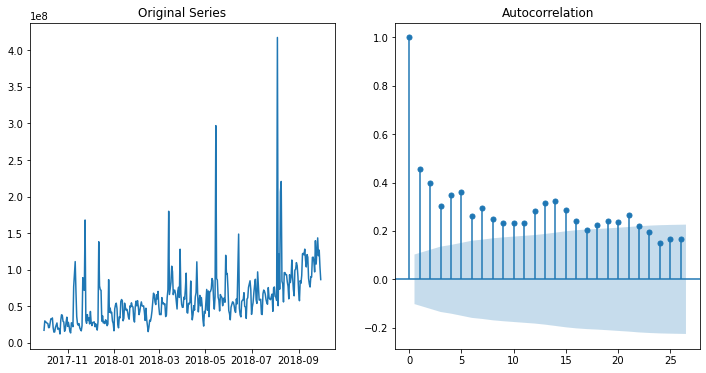

In [92]:
#Find the order of differencing (d) in ARIMA model using ACF(Autocorrelation Function)
from statsmodels.graphics.tsaplots import plot_acf

f=plt.figure(figsize=(12,6))
ax1=f.add_subplot(121)
ax1.set_title('Original Series')
ax1.plot(df.Revenue)

ax2 = f.add_subplot(122)
plot_acf(df.dropna(),ax=ax2)

plt.show()

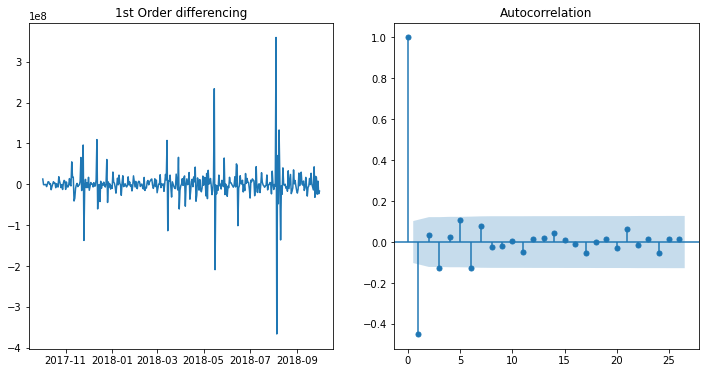

In [93]:
# Subtract the previous value from the current value one times.
f=plt.figure(figsize=(12,6))
ax1=f.add_subplot(121)
ax1.set_title('1st Order differencing')
ax1.plot(df.diff())

ax2 = f.add_subplot(122)
plot_acf(df.diff().dropna(),ax=ax2)

plt.show()


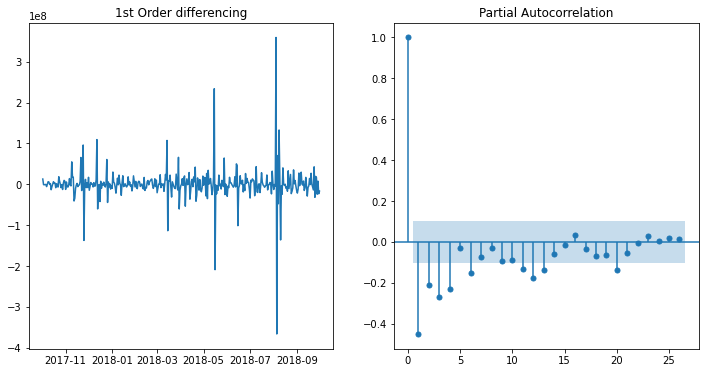

In [94]:
#Find the order of the AR term (p)
#we determine “p” based on the most significant lag in the partial autocorrelation plot. 
from statsmodels.graphics.tsaplots import plot_pacf

f=plt.figure(figsize=(12,6))
ax1=f.add_subplot(121)
ax1.set_title('1st Order differencing')
ax1.plot(df.diff())
ax2 = f.add_subplot(122)
plot_pacf(df.diff().dropna(),ax=ax2)

plt.show()

In [95]:
#Find the Moving Average(q): refers to the number of lagged forecast error. We can look at ACF plot for the number of MA term.
# q = 1 or 3

#Fitting the ARIMA Model
from statsmodels.tsa.arima_model import ARIMA

# 1,1,3 ARIMA Model
arima_model = ARIMA(df.Revenue, order=(1,1,3))
model_fit = arima_model.fit(disp = 0)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:              D.Revenue   No. Observations:                  364
Model:                 ARIMA(1, 1, 3)   Log Likelihood               -6800.448
Method:                       css-mle   S.D. of innovations       31207923.724
Date:                Wed, 24 Aug 2022   AIC                          13612.897
Time:                        16:34:08   BIC                          13636.279
Sample:                    10-02-2017   HQIC                         13622.190
                         - 09-30-2018                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            1.904e+05   2.09e+04      9.121      0.000    1.49e+05    2.31e+05
ar.L1.D.Revenue    -0.2569      0.216     -1.192      0.233      -0.680       0.166
ma.L1.D.Revenue    -0.5247      

In [96]:
# 4,1,1 ARIMA Model
model = ARIMA(df.Revenue, order=(4,1,1))
model_fit = model.fit(disp = 0)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:              D.Revenue   No. Observations:                  364
Model:                 ARIMA(4, 1, 1)   Log Likelihood               -6799.771
Method:                       css-mle   S.D. of innovations       31160716.857
Date:                Wed, 24 Aug 2022   AIC                          13613.541
Time:                        16:34:09   BIC                          13640.821
Sample:                    10-02-2017   HQIC                         13624.384
                         - 09-30-2018                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            1.904e+05   2.37e+04      8.027      0.000    1.44e+05    2.37e+05
ar.L1.D.Revenue     0.2135      0.052      4.081      0.000       0.111       0.316
ar.L2.D.Revenue     0.1038      

In [97]:
# 2,1,1 ARIMA Model
model = ARIMA(df.Revenue, order=(2,1,1))
model_fit = model.fit(disp = 0)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:              D.Revenue   No. Observations:                  364
Model:                 ARIMA(2, 1, 1)   Log Likelihood               -6801.236
Method:                       css-mle   S.D. of innovations       31283746.084
Date:                Wed, 24 Aug 2022   AIC                          13612.472
Time:                        16:34:10   BIC                          13631.958
Sample:                    10-02-2017   HQIC                         13620.217
                         - 09-30-2018                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            1.904e+05   2.26e+04      8.432      0.000    1.46e+05    2.35e+05
ar.L1.D.Revenue     0.2068      0.052      3.961      0.000       0.104       0.309
ar.L2.D.Revenue     0.1060      

2018-10-01     94547159
2018-10-02     94536425
2018-10-03     95514077
2018-10-04     95845939
2018-10-05     96149045
2018-10-06     96377741
2018-10-07     96588002
2018-10-08     96786561
2018-10-09     96980747
2018-10-10     97172787
2018-10-11     97363921
2018-10-12     97554639
2018-10-13     97745176
2018-10-14     97935630
2018-10-15     98126049
2018-10-16     98316451
2018-10-17     98506847
2018-10-18     98697239
2018-10-19     98887629
2018-10-20     99078020
2018-10-21     99268409
2018-10-22     99458799
2018-10-23     99649188
2018-10-24     99839578
2018-10-25    100029968
2018-10-26    100220357
2018-10-27    100410747
2018-10-28    100601136
2018-10-29    100791526
2018-10-30    100981915
2018-10-31    101172305
2018-11-01    101362694
2018-11-02    101553084
2018-11-03    101743473
2018-11-04    101933863
2018-11-05    102124252
2018-11-06    102314642
2018-11-07    102505032
2018-11-08    102695421
2018-11-09    102885811
2018-11-10    103076200
2018-11-11    10

<Figure size 864x432 with 0 Axes>

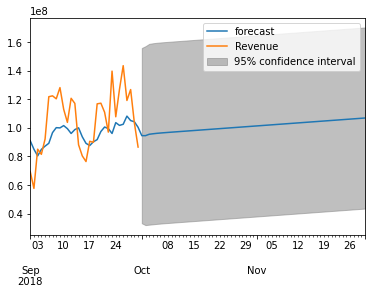

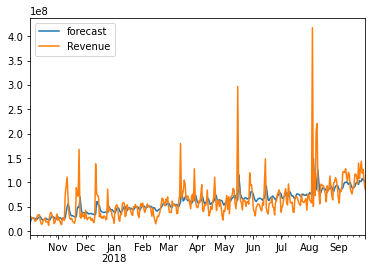

In [54]:
from statsmodels.graphics.tsaplots import plot_predict
model_2month = ARIMA(df, order=(2,1,1))
model_fit = model_2month.fit()
plt.figure(figsize = (12,6))
model_fit.plot_predict(start = 335, end = len(df)+60,dynamic=False)
model_fit.plot_predict(dynamic = False)
plt.show()

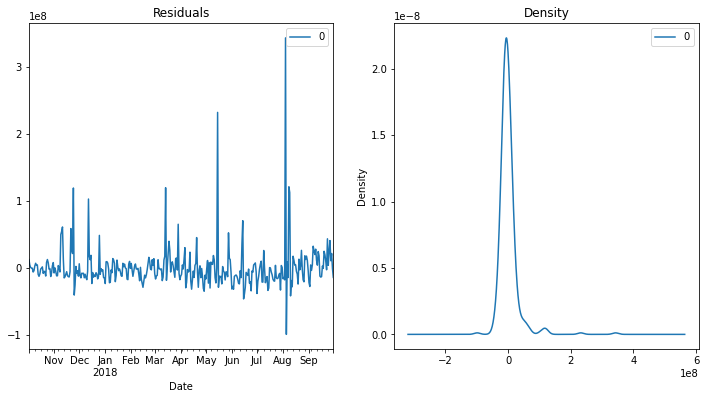

In [55]:
# The residuals are distributed around the mean of zero
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2, figsize=(12,6))
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

In [56]:
# Create Training and Test (80% as Train, 20% as Test)
n = int(len(df)*0.80)
train = df.Revenue[:n]
test = df.Revenue[n:]
print(len(train))
print(len(test))

292
73


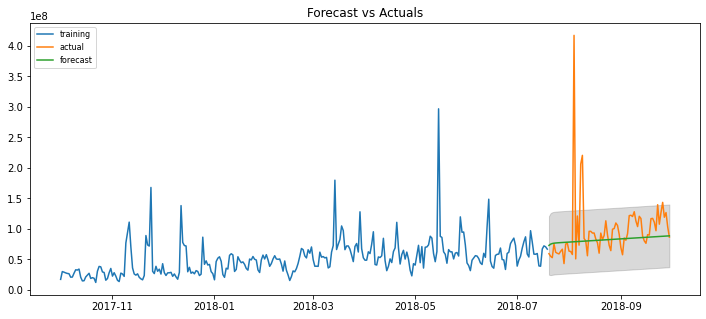

In [58]:
# Build Model
#model = ARIMA(train, order=(2,1,1))  
model = ARIMA(train, order=(2, 1, 1))  
fitted = model.fit(disp=0)  

# Forecast

fc, se, conf = fitted.forecast(len(test), alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5))
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

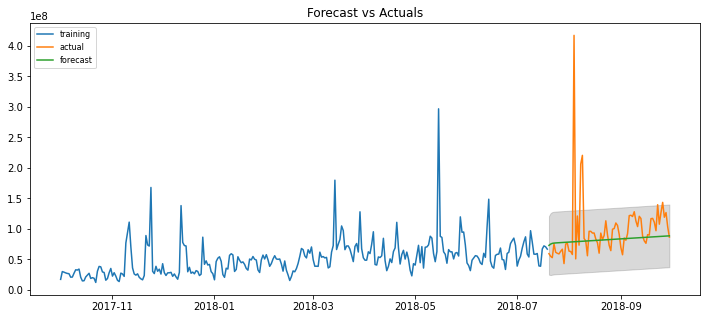

In [59]:
# Build Model
#model = ARIMA(train, order=(3,1,1))  
model = ARIMA(train, order=(3, 1, 1))  
fitted = model.fit(disp=0)  

# Forecast

fc, se, conf = fitted.forecast(len(test), alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5))
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [99]:
model_2month = ARIMA(df, order=(2,1,1))
model_fit = model_2month.fit()
pred_2month = model_fit.predict(start=len(df),end= len(df)+60, typ='levels').rename('Revenue_Prediction')
pred_2month = pred_2month.to_frame()
pd.set_option('display.max_rows', None)
pred_2month = pred_2month.Revenue_Prediction.astype(int)
pred_2month

2018-10-01     94547159
2018-10-02     94536425
2018-10-03     95514077
2018-10-04     95845939
2018-10-05     96149045
2018-10-06     96377741
2018-10-07     96588002
2018-10-08     96786561
2018-10-09     96980747
2018-10-10     97172787
2018-10-11     97363921
2018-10-12     97554639
2018-10-13     97745176
2018-10-14     97935630
2018-10-15     98126049
2018-10-16     98316451
2018-10-17     98506847
2018-10-18     98697239
2018-10-19     98887629
2018-10-20     99078020
2018-10-21     99268409
2018-10-22     99458799
2018-10-23     99649188
2018-10-24     99839578
2018-10-25    100029968
2018-10-26    100220357
2018-10-27    100410747
2018-10-28    100601136
2018-10-29    100791526
2018-10-30    100981915
2018-10-31    101172305
2018-11-01    101362694
2018-11-02    101553084
2018-11-03    101743473
2018-11-04    101933863
2018-11-05    102124252
2018-11-06    102314642
2018-11-07    102505032
2018-11-08    102695421
2018-11-09    102885811
2018-11-10    103076200
2018-11-11    10

<Figure size 864x432 with 0 Axes>

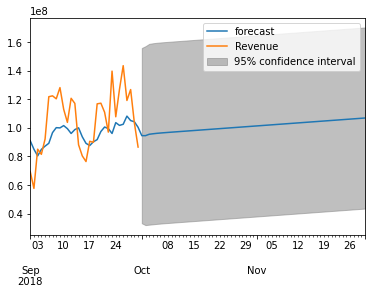

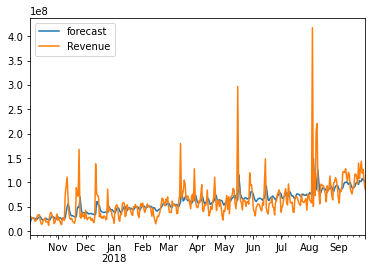

In [101]:
from statsmodels.graphics.tsaplots import plot_predict
model_2month = ARIMA(df, order=(2,1,1))
model_fit = model_2month.fit()
plt.figure(figsize = (12,6))
model_fit.plot_predict(start = 335, end = len(df)+60,dynamic=False)
model_fit.plot_predict(dynamic = False)
plt.show()

In [105]:
# Accuracy metrics
from statsmodels.graphics.tsaplots import plot_acf
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse,
            'corr':corr, 'minmax':minmax})

forecast_accuracy(fc, test.values)


{'mape': 0.22694523690329055,
 'me': -14988162.963616084,
 'mae': 25863367.49652531,
 'mpe': -0.04077238544843372,
 'rmse': 50506735.067943685,
 'corr': 0.20308613587745966,
 'minmax': 0.20253325227005214}